# **ASSIGNMENT - IV**

Importing Necessary Modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into the tool

In [ ]:
d=pd.read_csv("Mall_Customers.csv")
d=d.rename(columns = {'Annual Income (k$)' : 'Annual_Income','Spending Score (1-100)' : 'Spending_Score'})
d.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform Below Visualizations

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


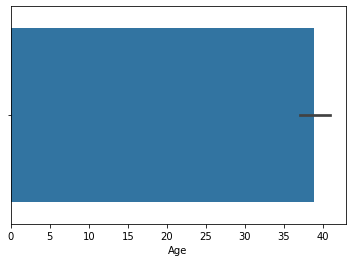

In [ ]:
sns.barplot(d.Age)

Bi- Variate Analysis

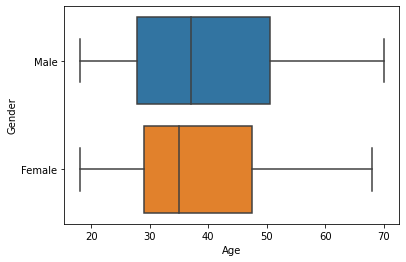

In [ ]:
sns.boxplot(y=d.Gender,x=d.Age)

Multi-Variate Analysis

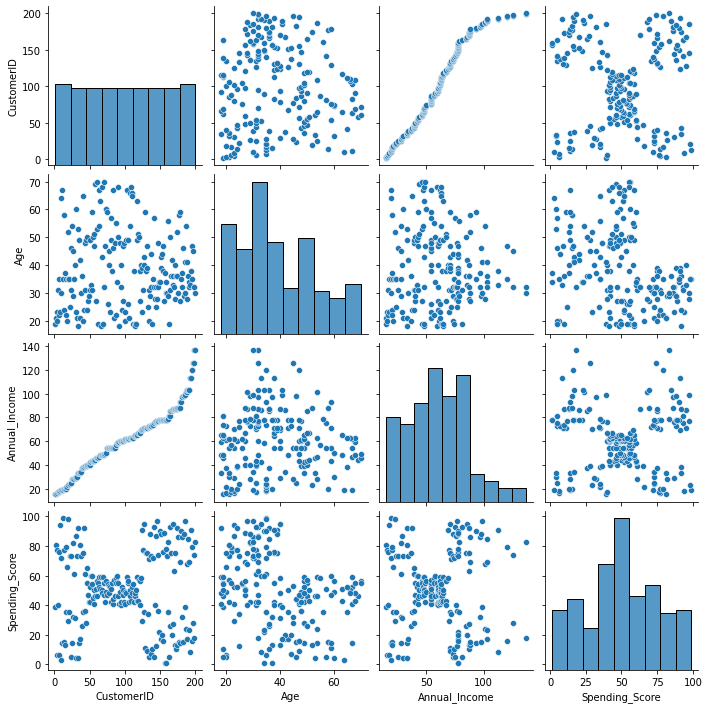

In [ ]:
sns.pairplot(d)

**Perform descriptive statistics on the dataset**

In [ ]:
d.shape

(200, 5)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
d.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual_Income  Spending_Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]>

**Check for Missing values and deal with them**

In [ ]:
d.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

**Find the outliers and replace them outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


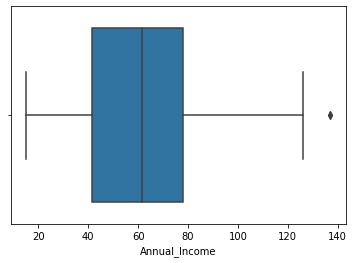

In [ ]:
sns.boxplot(d['Annual_Income'])

In [ ]:
q1 = d.Annual_Income.quantile(0.25)
q2 = d.Annual_Income.quantile(0.75)
IQR = q2 - q1
print(IQR)

36.5


In [ ]:
d=d[~((d.Annual_Income<(q1-1.5*IQR))|(d.Annual_Income>(q2+1.5*IQR)))]
d

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


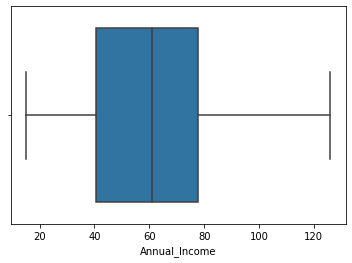

In [ ]:
sns.boxplot(d['Annual_Income'])

**Check for Categorical columns and perform encoding**

In [ ]:
d.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
d.Gender = le.fit_transform(d.Gender)

d.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(d)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00507614, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01015228, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01522843, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.02030457, 0.        , 0.25      , 0.01801802, 0.39795918]])

**Perform any of the clustering algorithms**

In [ ]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([7, 7, 4, 4, 4, 4, 2, 4, 1, 4, 1, 4, 2, 4, 7, 7, 4, 7, 1, 4, 7, 7,
       2, 7, 2, 7, 2, 7, 2, 4, 1, 4, 1, 7, 2, 4, 2, 4, 2, 4, 2, 7, 1, 4,
       2, 4, 2, 4, 4, 4, 2, 7, 4, 1, 2, 1, 2, 1, 4, 1, 1, 7, 2, 2, 1, 7,
       2, 2, 7, 4, 1, 2, 2, 2, 1, 7, 2, 1, 4, 2, 1, 7, 1, 2, 4, 1, 2, 4,
       4, 2, 2, 7, 1, 2, 4, 7, 2, 4, 1, 7, 4, 2, 1, 7, 1, 4, 2, 1, 1, 1,
       1, 4, 0, 7, 4, 4, 2, 2, 2, 2, 6, 0, 5, 6, 0, 5, 3, 6, 3, 6, 3, 6,
       0, 5, 3, 5, 0, 6, 3, 5, 0, 6, 0, 5, 3, 6, 3, 5, 0, 6, 3, 6, 0, 5,
       0, 5, 3, 5, 3, 5, 0, 5, 3, 5, 3, 5, 3, 5, 0, 6, 3, 6, 3, 6, 0, 5,
       3, 6, 3, 6, 0, 5, 3, 5, 0, 6, 0, 6, 0, 5, 0, 5, 3, 5, 0, 5, 0, 6],
      dtype=int32)

In [ ]:
data1 = pd.DataFrame(data_scaled, columns = d.columns)
data1.drop('CustomerID',axis=1,inplace=True)
data1.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [ ]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual_Income,Spending_Score,kclus
0,1.0,0.019231,0.000000,0.387755,7
1,1.0,0.057692,0.000000,0.816327,7
2,0.0,0.038462,0.009009,0.051020,4
3,0.0,0.096154,0.009009,0.775510,4
4,0.0,0.250000,0.018018,0.397959,4


In [ ]:
data1['kclus'].unique()

array([7, 4, 2, 1, 0, 6, 5, 3], dtype=int32)

In [ ]:
data1['kclus'].value_counts()

2    36
4    34
1    26
7    23
5    22
0    20
3    19
6    18
Name: kclus, dtype: int64

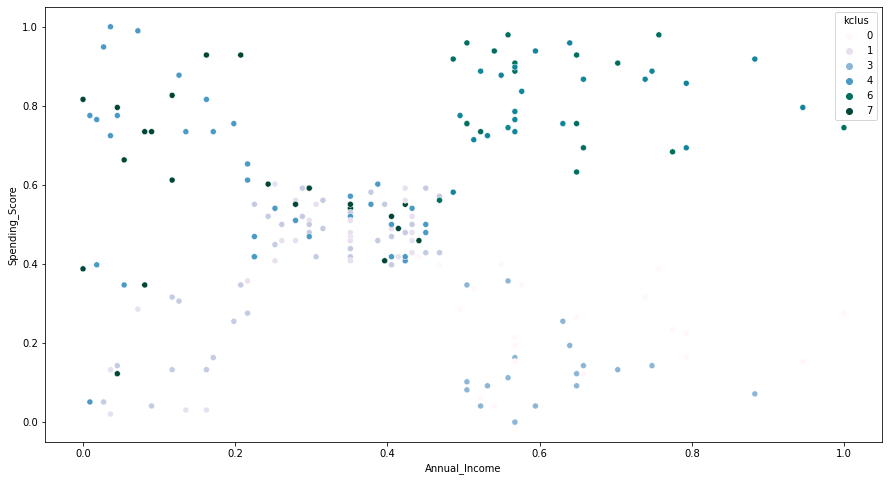

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual_Income'],
                y=data1['Spending_Score'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [ ]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [ ]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,7
1,7
2,4
3,4
4,4


**Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual_Income,Spending_Score
124,0.0,0.096154,0.495495,0.285714
97,0.0,0.173077,0.405405,0.500000
42,1.0,0.576923,0.216216,0.357143
17,1.0,0.038462,0.054054,0.663265
5,0.0,0.076923,0.018018,0.765306


In [ ]:
x_test.head()

,Gender,Age,Annual_Income,Spending_Score
175,0.0,0.230769,0.657658,0.867347
40,0.0,0.903846,0.207207,0.346939
34,0.0,0.596154,0.162162,0.132653
90,0.0,0.961538,0.396396,0.551020
145,1.0,0.192308,0.558559,0.979592


In [ ]:
y_train.head()

,kclus
124,0
97,4
42,1
17,7
5,4


In [ ]:
y_test.head()

,kclus
175,5
40,2
34,2
90,2
145,6


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[ 4.64288923],
       [-0.02608394],
       [ 0.60860973],
       [ 0.32236886],
       [ 6.84434696]])

**Measure the performance using Evaluation Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  1.7521151163465696
The Root mean squared error is:  1.3236748529554263
The Mean absolute error is:  1.0670501130362768
The accuracy is:  0.5743562710812031
